# How to install Jupiter
Jupiter is on PyPI, so you can use pip to install it:
```
# bash
$ pip install jupiter-negotiation
$ jupiter --test
```
Jupiter is only developed in Python3.
If you want to use Jupiter, please see this notebook.

# 1. import jupiter

In [1]:
from jupiter.simulator import Jupiter
from jupiter.simulator import negotiationRule

# 2. open paths about domain file and agents file

In [2]:
import sys
import os
import site
import importlib
from jupiter import agents

# 3. execute test

------------------------------
start negotiation: 1
last turn: 0.11666666666666667
agreement bid: [0, 0]
parato distance: 0.2831292
nash distance: 0.33097187
LinearAgent : 0.7644222742526002
ConsederAgent : 0.5096148495017334


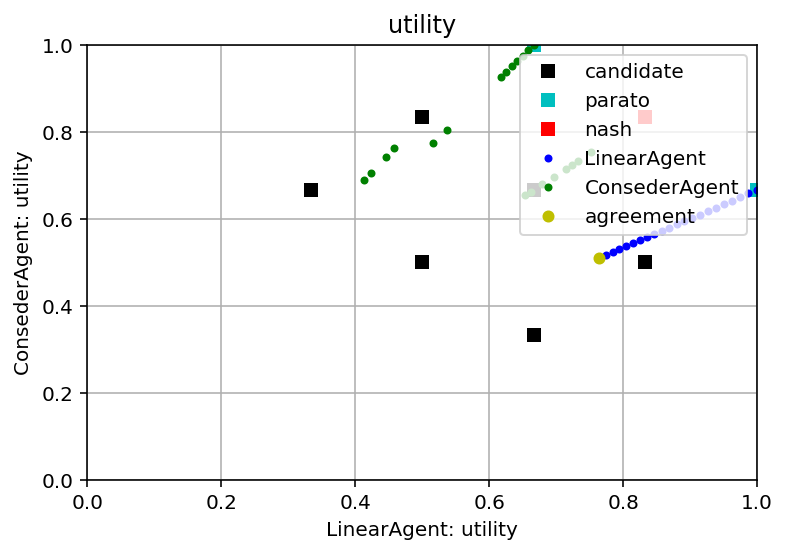

0

In [3]:
from jupiter.simulator import jupiter
%config InlineBackend.figure_format = 'retina'
jupiter.test(is_notebook=True)

# 4. Negotiation with two players (display the process of a negotiation)

------------------------------
start negotiation: 1


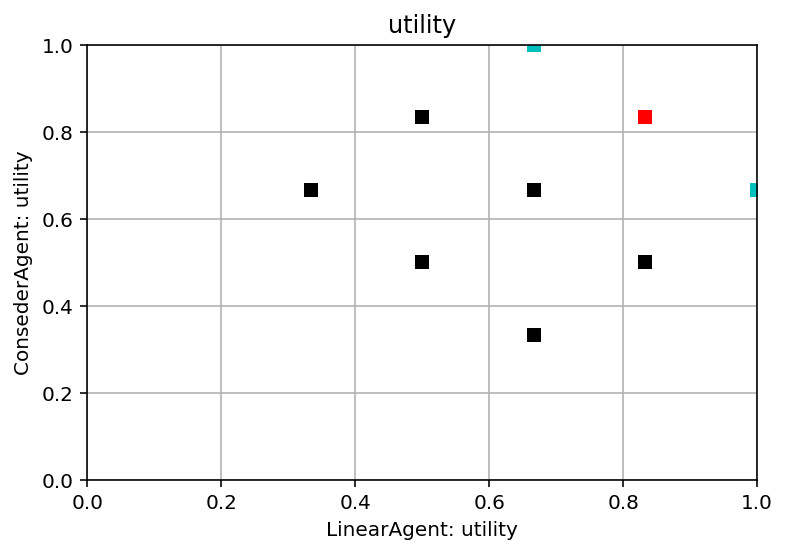

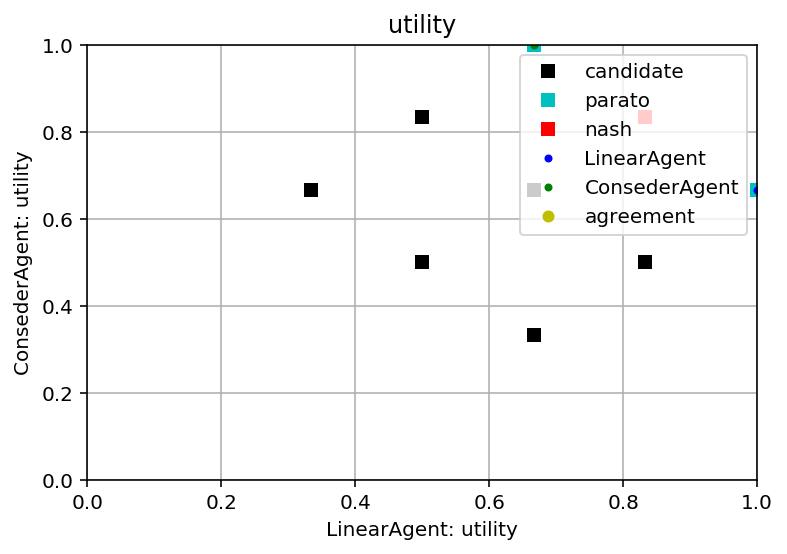

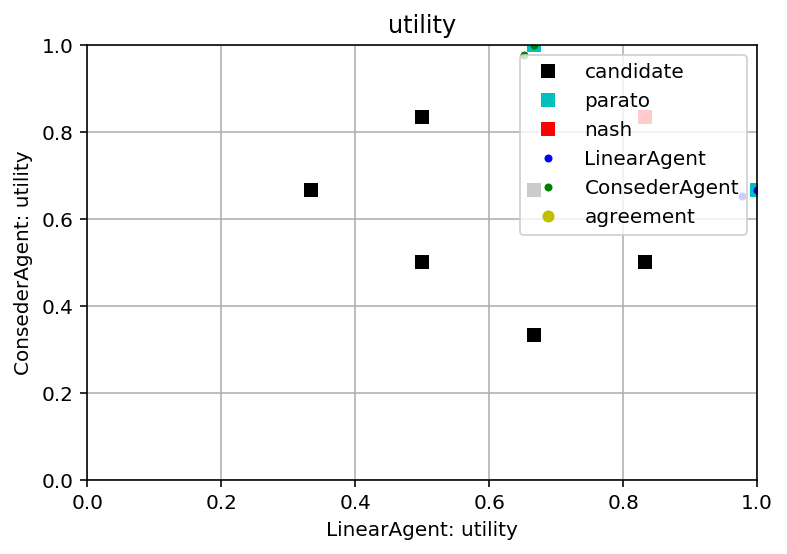

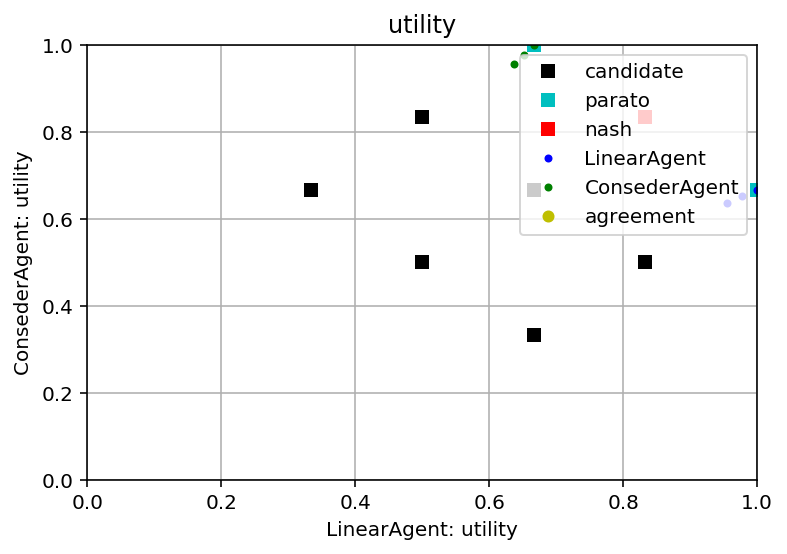

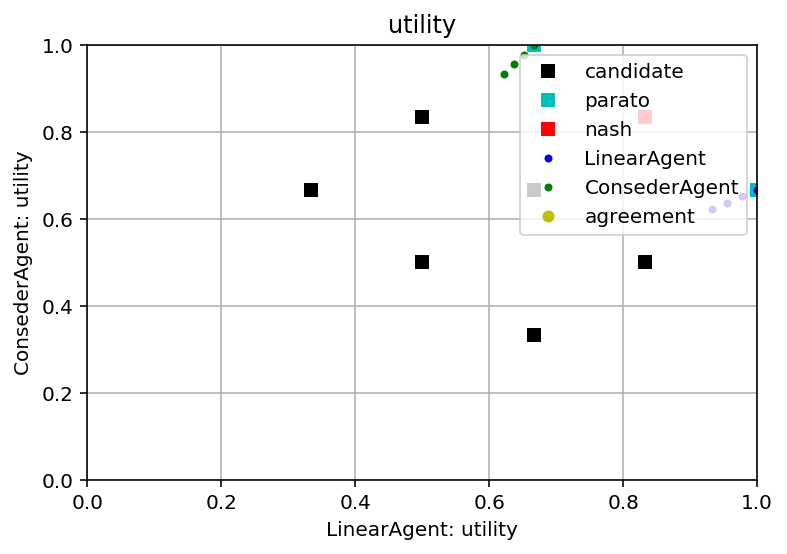

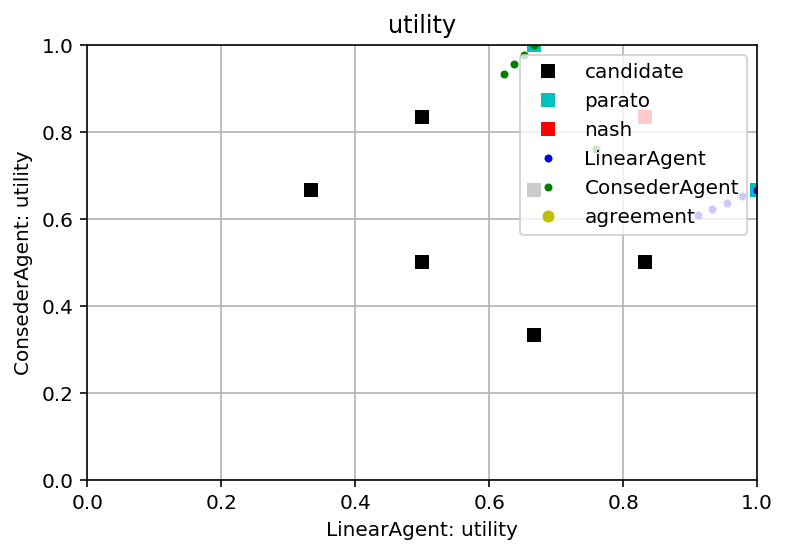

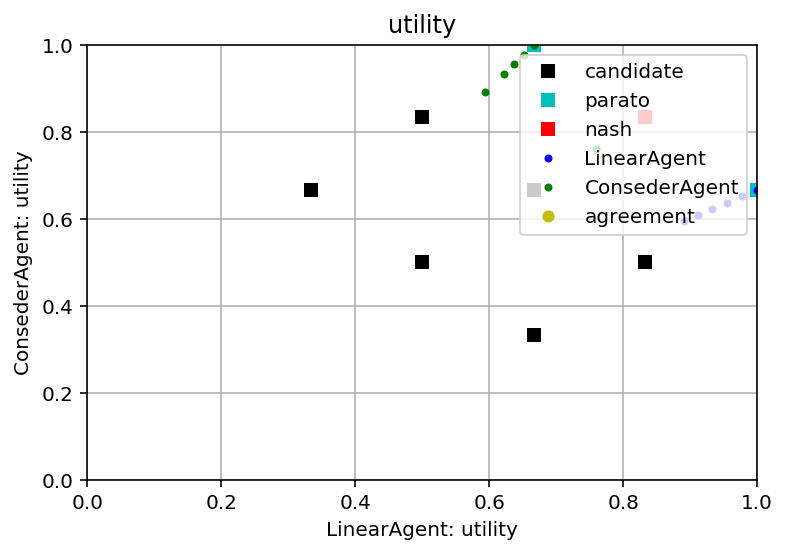

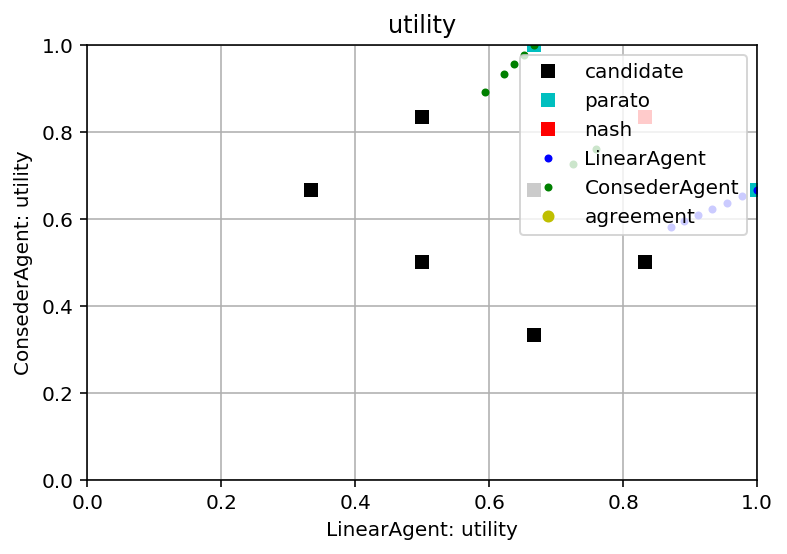

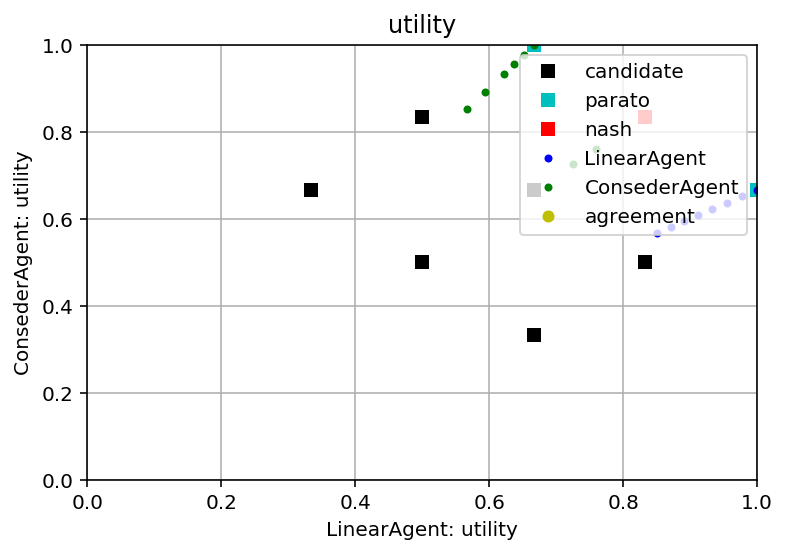

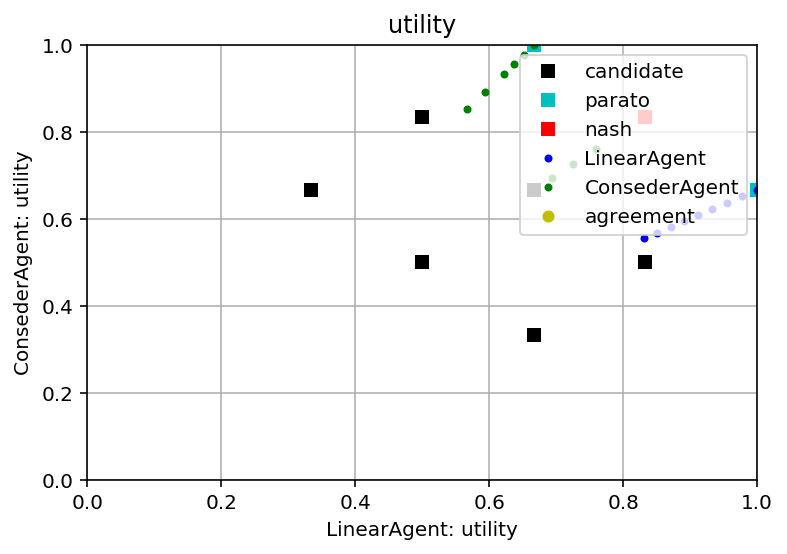

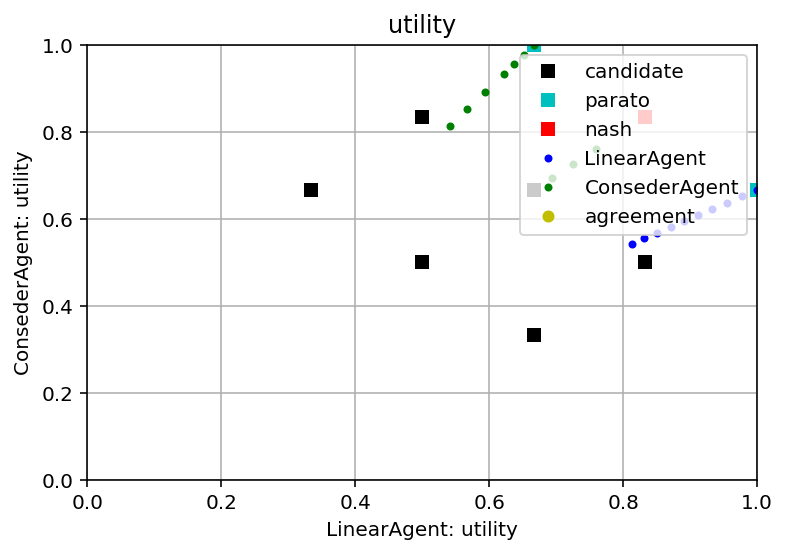

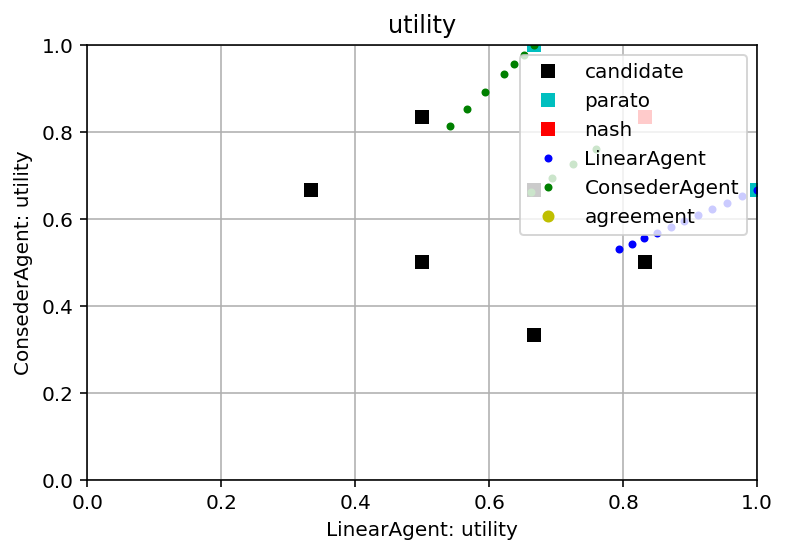

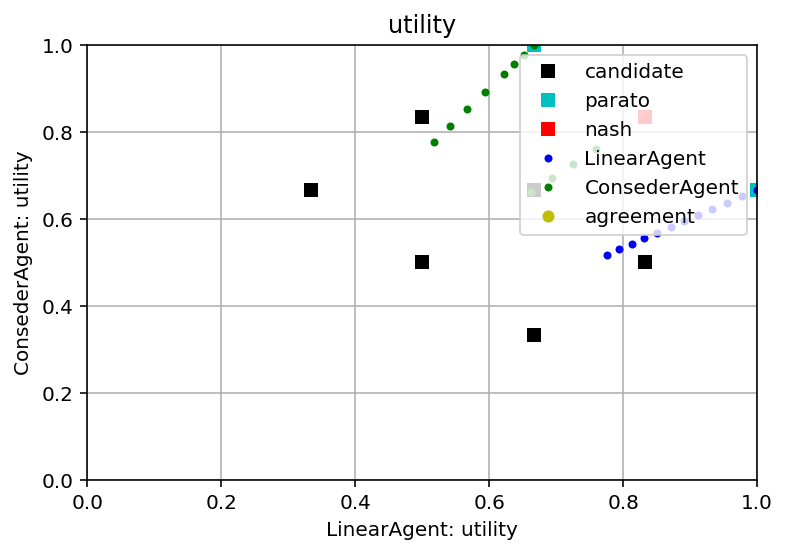

last turn: 0.12
agreement bid: [0, 0]
parato distance: 0.29015362
nash distance: 0.33603564
LinearAgent : 0.7585775750291838
ConsederAgent : 0.5057183833527892


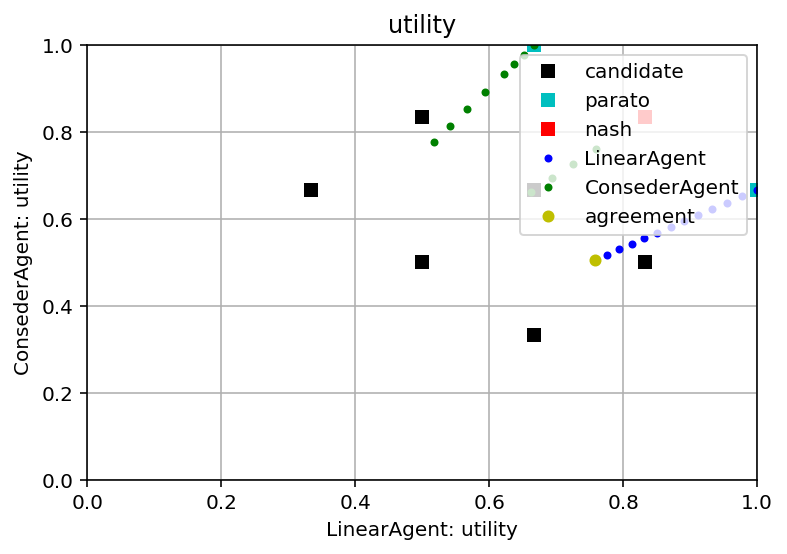

In [4]:
jupiter = Jupiter(negotiationRule.TypeOfNegotiation.Turn, 100, 
                  '../jupiter/domain/Atlas3/triangularFight.xml',
                  '../jupiter/domain/Atlas3/triangularFight_util1.xml',  
                  '../jupiter/domain/Atlas3/triangularFight_util2.xml')  
import linearAgent
jupiter.set_agent(linearAgent, 'LinearAgent')
import concederAgent
jupiter.set_agent(concederAgent, 'ConcederAgent')

jupiter.set_notebook_flag()
%config InlineBackend.figure_format = 'retina'
jupiter.do_negotiation(is_printing=True, print_times=1)
jupiter.display.plot_initialize()
jupiter.display.plot2_notebook(jupiter.get_action_list_list()[-1],
                               jupiter.get_agreement_list()[-1])


# 5. A example of repeated negotiation

In [5]:
jupiter = Jupiter(negotiationRule.TypeOfNegotiation.Turn, 30, 
                  '../jupiter/domain/Atlas3/triangularFight.xml',
                  '../jupiter/domain/Atlas3/triangularFight_util1.xml',  
                  '../jupiter/domain/Atlas3/triangularFight_util2.xml',
                  '../jupiter/domain/Atlas3/triangularFight_util3.xml')
import linearAgent
jupiter.set_agent(linearAgent, 'LinearAgent')
import concederAgent
jupiter.set_agent(concederAgent, 'ConcederAgent')
import boulwareAgent
jupiter.set_agent(boulwareAgent, 'BoulwareAgent')

# repeat a negotiation 100 times.
for i in range(0, 100):
    jupiter.do_negotiation(is_printing=False)


------------------------------
start negotiation: 1
last turn: 0.4666666666666667
agreement bid: [2, 0]
parato distance: 0.6500584
nash distance: 1.0039668
LinearAgent : 0.22763659158890676
ConsederAgent : 0.11381829579445338
BoulwareAgent : 0.34145488738336016
------------------------------
start negotiation: 2
last turn: 0.4666666666666667
agreement bid: [2, 0]
parato distance: 0.6500584
nash distance: 1.0039668
LinearAgent : 0.22763659158890676
ConsederAgent : 0.11381829579445338
BoulwareAgent : 0.34145488738336016
------------------------------
start negotiation: 3
last turn: 0.4666666666666667
agreement bid: [2, 0]
parato distance: 0.6500584
nash distance: 1.0039668
LinearAgent : 0.22763659158890676
ConsederAgent : 0.11381829579445338
BoulwareAgent : 0.34145488738336016
------------------------------
start negotiation: 4
last turn: 0.4666666666666667
agreement bid: [2, 0]
parato distance: 0.6500584
nash distance: 1.0039668
LinearAgent : 0.22763659158890676
ConsederAgent : 0.113818

# 6.1 Get the results of negotiation

In [8]:
utility_list = jupiter.get_end_utility_list()
linear = []
boulware = []
conceder = []
parato = []
for i in utility_list:
    print(i)
    linear.append(i["LinearAgent"])
    boulware.append(i["BoulwareAgent"])
    conceder.append(i["ConsederAgent"])
    parato.append(i["parato_distance"])

{'LinearAgent': 0.22763659158890676, 'ConsederAgent': 0.11381829579445338, 'BoulwareAgent': 0.34145488738336016, 'agreement_bid': [2, 0], 'parato_distance': 0.6500584}
{'LinearAgent': 0.22763659158890676, 'ConsederAgent': 0.11381829579445338, 'BoulwareAgent': 0.34145488738336016, 'agreement_bid': [2, 0], 'parato_distance': 0.6500584}
{'LinearAgent': 0.22763659158890676, 'ConsederAgent': 0.11381829579445338, 'BoulwareAgent': 0.34145488738336016, 'agreement_bid': [2, 0], 'parato_distance': 0.6500584}
{'LinearAgent': 0.22763659158890676, 'ConsederAgent': 0.11381829579445338, 'BoulwareAgent': 0.34145488738336016, 'agreement_bid': [2, 0], 'parato_distance': 0.6500584}
{'LinearAgent': 0.22763659158890676, 'ConsederAgent': 0.11381829579445338, 'BoulwareAgent': 0.34145488738336016, 'agreement_bid': [2, 0], 'parato_distance': 0.6500584}
{'LinearAgent': 0.22763659158890676, 'ConsederAgent': 0.11381829579445338, 'BoulwareAgent': 0.34145488738336016, 'agreement_bid': [2, 0], 'parato_distance': 0.6

# 6.2 Plot the results.

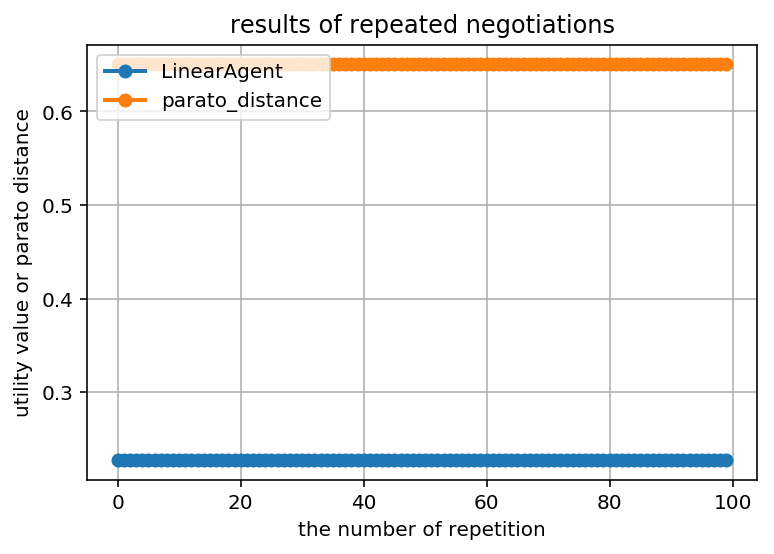

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

left = np.array(range(0, len(utility_list)))
p2 = plt.plot(left, linear, marker='o', linewidth=2)
p3 = plt.plot(left, parato, marker='o', linewidth=2)
plt.title("results of repeated negotiations")
plt.xlabel("the number of repetition")
plt.ylabel("utility value or parato distance")
plt.grid(True)
plt.legend(( p2[0], p3[0]), ( "LinearAgent", "parato_distance"), loc=2)

In [12]:
from plotly.offline import iplot, init_notebook_mode
import plotly.plotly as py
from plotly.graph_objs import Scatter, Data


init_notebook_mode(connected=True) 

trace0 = Scatter(
    x=left,
    y=parato,
    name="parato_distance"
)

trace1 = Scatter(
    x=left,
    y=linear,
    name="LinearAgent"
)

data = Data([trace0, trace1])
# data = Data([trace0])
unique_url = iplot(data, filename = 'basic-line')